# 6 - Peticiones a Webs y APIs
![api](https://images.ctfassets.net/vwq10xzbe6iz/5sBH4Agl614xM7exeLsTo7/9e84dce01735f155911e611c42c9793f/rest-api.png)

##  6.1 - APIs

En el mundo actual de la programación, las APIs (Interfaces de Programación de Aplicaciones, por sus siglas en inglés) desempeñan un papel fundamental al permitir la *comunicación y la integración entre diferentes programas* de software. Una API actúa como un conjunto de ***reglas y especificaciones*** que definen cómo dos aplicaciones pueden interactuar y compartir datos entre sí.

Al utilizar una API, un desarrollador puede escribir un programa que solicite servicios o información de un sistema operativo, una plataforma en línea o cualquier otra aplicación que ofrezca una API pública (o de pago).

La API proporciona una interfaz clara y definida a través de la cual el programa puede enviar solicitudes de procesamiento y recibir los datos necesarios en respuesta.

Cada API tiene su propia sintaxis y estructura, que se describe en detalle en la documentación proporcionada por el proveedor de la API. Esta documentación explica cómo se deben formular las solicitudes, qué parámetros se deben incluir y cómo interpretar y utilizar las respuestas recibidas. Es importante tener en cuenta que cada API es única y puede tener diferentes métodos de autenticación, limitaciones de uso y características específicas.

En general, las APIs constan de dos componentes principales. En primer lugar, está la especificación, que define cómo se realiza el intercambio de información entre programas. Esto incluye el formato de las solicitudes y respuestas, los tipos de datos admitidos y cualquier convención de nomenclatura necesaria. En segundo lugar, está la implementación real de la interfaz de software que cumple con la especificación. Esta implementación se proporciona y publica de alguna manera para que otros desarrolladores puedan utilizarla.

En muchos casos, las APIs se utilizan para obtener información actualizada de fuentes externas. Esto puede incluir datos en tiempo real, como información meteorológica, cotizaciones de acciones, resultados de búsquedas o actualizaciones de redes sociales. Al acceder a estas APIs, los desarrolladores pueden enriquecer sus aplicaciones con datos relevantes y actualizados, brindando a los usuarios una experiencia más completa y personalizada.

En resumen, las APIs son una herramienta poderosa para la comunicación y la integración de software. Permiten que diferentes programas se conecten y compartan datos de manera eficiente, al tiempo que brindan a los desarrolladores acceso a una amplia gama de servicios y recursos. Al comprender cómo interactuar con las APIs y aprovechar su funcionalidad, los desarrolladores pueden crear aplicaciones más sofisticadas y conectadas que se benefician de la vasta cantidad de información disponible en la web.

De manera general, usaremos las api para obtener información.

### Peticiones a la web (GET)

Usaremos la librería [requests](https://docs.python-requests.org/en/master/) para realizar peticiones a la web.

In [ ]:
#%pip install requests

In [ ]:
import requests as req #Req es un standard en cuanto a alias para requests

In [ ]:
url='http://www.google.es'

In [ ]:
req.get(url)  # realiza la peticion get, nos da codigo 200, que es que todo ha ido bien

<Response [200]>

In [ ]:
type(req.get(url))

requests.models.Response

In [ ]:
respuesta = req.get(url) #Puedo guardarlo en una variable para trabajar con ello

Para ver el contenido de la respuesta que me da la web tengo que hacer a través del atributo `.text`

In [ ]:
type(respuesta.text)

str

Esto es una string y es el html de la página, al ser una string podemos usar los métodos de las cadenas, recordáis? 🤔

In [ ]:
respuesta.text#[:100] #Vamos a hacer un slicing del contenido de la web

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta content="Search the world\'s information, including webpages, images, videos and more. Google has many special features to help you find exactly what you\'re looking for." name="description"><meta content="noodp, " name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/logos/doodles/2024/celebrating-etel-adnan-6753651837110479-l.png" itemprop="image"><meta content="Celebrating Etel Adnan" property="twitter:title"><meta content="Celebrating Etel Adnan! #GoogleDoodle" property="twitter:description"><meta content="Celebrating Etel Adnan! #GoogleDoodle" property="og:description"><meta content="summary_large_image" property="twitter:card"><meta content="@GoogleDoodles" property="twitter:site"><meta content="https://www.google.com/logos/doodles/2024/celebrating-etel-adnan-6753651837110479-2x.png" property="twitter:image"><meta content="https://www.google.com

### Estructura general de un html

Estructura general de un `html`

![html](https://francescricart.com/wp-content/uploads/2018/02/estructura-documento-web-1.jpg)

Estructura general de `html5`

![html5](https://www.eniun.com/wp-content/uploads/estructura-etiquetas-html.png)

Esto es el contenido de la página de inicio de google que es lo que hemos usado como url. Vamos a cambiarlo, pero para ello vamos a ir un segundo a google para ver como compone las urls

[Link a google](https://www.google.com/)

In [ ]:
url='http://www.google.com/search?q=gamma+tech+school' #url con parametros, hay infinitos parametros

In [ ]:
req.get(url)

<Response [200]>

Parece que todo ha ido bien verdad?

Es muy común cuando estoy haciendo peticiones a la web en un .py o estoy haciendo peticiones en bucle, que necesite comprobar que las respuestas son correctas. ¿Como podemos hacerlo?

In [ ]:
req.get(url)

<Response [200]>

In [ ]:
#Podemos hacerlo así
req.get(url).status_code == 200

True

In [ ]:
req.get(url).text[0:1500] #Mostramos la primera parte de mi string

'<!doctype html><html lang="en"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>gamma tech school - Google Search</title><script nonce="O34WfLTScL516kvGzbOBHA">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.goo

In [ ]:
url = 'https://infocif.economia3.com/ranking/ventas-empresas/espana'
len(req.get(url).text) #El código puede ser enorme

218343

In [ ]:
req.get(url).text[:1000]

'\r\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "https://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="https://www.w3.org/1999/xhtml">\r\n\t<head>\r\n    <meta http-equiv="Content-Type" content="text/html" charset="UTF-8" />\r\n      <meta name="viewport" content="width=device-width, initial-scale=1.0">\r\n\t\t<meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1" />\r\n        \r\n\t\t\t\t<title>Ranking de Ventas Empresas Españolas</title>\r\n            \r\n\t\t\t\t<meta name="description" content="Infonif muestra el primer Ranking de Ventas de Empresas Españolas GRATIS detallando Ventas, EBITDA, Resultados, Empleados, Actividad y las principales magnitudes del BALANCE.">\r\n            \r\n       \t \t<link rel="canonical" href="https://infonif.economia3.com/ranking/ventas-empresas/espana" />\r\n\t\t\r\n\t\t\t<link rel="next" href="https://infonif.economia3.com/ranking/ventas-empresas/espana?pagina=2" />\r\n\t\t\r\n        \t

## 6.2 - Llamadas a APIs 🤖

Existe un repo de GitHub con el listado más grande del mundo de APIs gratuitas listas para que las consultemos y usemos en nuestros proyectos
🌟 [repo](https://github.com/public-apis/public-apis) 🌟

### Nobel Master Data (Api de [premios nobel](https://app.swaggerhub.com/apis/NobelMedia/NobelMasterData/2.1#/default/get_nobelPrizes) )

Vamos a hacerlo desde CERO. Lo primero vamos a ver la docu a ver que nos cuentan de como usarla

In [ ]:
#Tenemos que conseguir esa url
url = 'http://api.nobelprize.org/2.1/nobelPrizes'

In [ ]:
#Como podemos ver el contenido de manera más comoda y navegable?
response = req.get(url)
response

<Response [200]>

In [ ]:
response.text

'{"nobelPrizes":[{"awardYear":"1901","category":{"en":"Chemistry","no":"Kjemi","se":"Kemi"},"categoryFullName":{"en":"The Nobel Prize in Chemistry","no":"Nobelprisen i kjemi","se":"Nobelpriset i kemi"},"dateAwarded":"1901-11-12","prizeAmount":150782,"prizeAmountAdjusted":9704878,"links":[{"rel":"nobelPrize","href":"https://api.nobelprize.org/2/nobelPrize/che/1901","action":"GET","types":"application/json"}],"laureates":[{"id":"160","knownName":{"en":"Jacobus H. van \'t Hoff"},"fullName":{"en":"Jacobus Henricus van \'t Hoff"},"portion":"1","sortOrder":"1","motivation":{"en":"in recognition of the extraordinary services he has rendered by the discovery of the laws of chemical dynamics and osmotic pressure in solutions","se":"såsom ett erkännande av den utomordentliga förtjänst han inlagt genom upptäckten av lagarna för den kemiska dynamiken och för det osmotiska trycket i lösningar"},"links":[{"rel":"laureate","href":"https://api.nobelprize.org/2/laureate/160","action":"GET","types":"app

In [ ]:
#response.json() #Es el primo mayor de los diccionarios de Python

In [ ]:
r = response.json() #response convertida en json
r.keys()

dict_keys(['nobelPrizes', 'meta', 'links'])

In [ ]:
# Veamos qué hay en este json
r

{'nobelPrizes': [{'awardYear': '1901',
   'category': {'en': 'Chemistry', 'no': 'Kjemi', 'se': 'Kemi'},
   'categoryFullName': {'en': 'The Nobel Prize in Chemistry',
    'no': 'Nobelprisen i kjemi',
    'se': 'Nobelpriset i kemi'},
   'dateAwarded': '1901-11-12',
   'prizeAmount': 150782,
   'prizeAmountAdjusted': 9704878,
   'links': [{'rel': 'nobelPrize',
     'href': 'https://api.nobelprize.org/2/nobelPrize/che/1901',
     'action': 'GET',
     'types': 'application/json'}],
   'laureates': [{'id': '160',
     'knownName': {'en': "Jacobus H. van 't Hoff"},
     'fullName': {'en': "Jacobus Henricus van 't Hoff"},
     'portion': '1',
     'sortOrder': '1',
     'motivation': {'en': 'in recognition of the extraordinary services he has rendered by the discovery of the laws of chemical dynamics and osmotic pressure in solutions',
      'se': 'såsom ett erkännande av den utomordentliga förtjänst han inlagt genom upptäckten av lagarna för den kemiska dynamiken och för det osmotiska trycke

In [ ]:
len(r['nobelPrizes'])

25

In [ ]:
len(r['meta'])

6

In [ ]:
len(r['links'])

4

In [ ]:
# Comprobamos qué hay en meta
r['meta']

{'offset': 0,
 'limit': 25,
 'count': 670,
 'terms': 'https://www.nobelprize.org/about/terms-of-use-for-api-nobelprize-org-and-data-nobelprize-org/',
 'license': 'https://www.nobelprize.org/about/terms-of-use-for-api-nobelprize-org-and-data-nobelprize-org/#licence',
 'disclaimer': 'https://www.nobelprize.org/about/terms-of-use-for-api-nobelprize-org-and-data-nobelprize-org/#disclaimer'}

In [ ]:
# Comprobamos qué hay en links
r['links']

{'first': 'https://masterdataapi.nobelprize.org/2.1/nobelPrizes?offset=0&limit=25',
 'self': 'https://masterdataapi.nobelprize.org/2.1/nobelPrizes?offset=0&limit=25',
 'next': 'https://masterdataapi.nobelprize.org/2.1/nobelPrizes?offset=25&limit=25',
 'last': 'https://masterdataapi.nobelprize.org/2.1/nobelPrizes?offset=650&limit=25'}

Está limitado a 25, pero eso lo podemos modificar. Se cambia simplemente el endpoint. Fijaos que dice que hay datos de 670 premios Nobel. También, si analizáis el link, veis `offset=0&limit=25`

Si modificamos simplemente que después de `nobelPrizes` esté el endpoint con otro limit podemos saltarnos esta limitación.

In [ ]:
url = 'http://api.nobelprize.org/2.1/nobelPrizes?limit=670'
#url = 'http://api.nobelprize.org/2.1/nobelPrizes'

# Sacando directamente el JSON accediendo directamente a la key 'nobelPrizes'
r = req.get(url).json()['nobelPrizes']
len(r)

670

In [ ]:
r[0]

{'awardYear': '1901',
 'category': {'en': 'Chemistry', 'no': 'Kjemi', 'se': 'Kemi'},
 'categoryFullName': {'en': 'The Nobel Prize in Chemistry',
  'no': 'Nobelprisen i kjemi',
  'se': 'Nobelpriset i kemi'},
 'dateAwarded': '1901-11-12',
 'prizeAmount': 150782,
 'prizeAmountAdjusted': 9704878,
 'links': [{'rel': 'nobelPrize',
   'href': 'https://api.nobelprize.org/2/nobelPrize/che/1901',
   'action': 'GET',
   'types': 'application/json'}],
 'laureates': [{'id': '160',
   'knownName': {'en': "Jacobus H. van 't Hoff"},
   'fullName': {'en': "Jacobus Henricus van 't Hoff"},
   'portion': '1',
   'sortOrder': '1',
   'motivation': {'en': 'in recognition of the extraordinary services he has rendered by the discovery of the laws of chemical dynamics and osmotic pressure in solutions',
    'se': 'såsom ett erkännande av den utomordentliga förtjänst han inlagt genom upptäckten av lagarna för den kemiska dynamiken och för det osmotiska trycket i lösningar'},
   'links': [{'rel': 'laureate',
   

Podemos utilizar la API para ver directamente ciertos datos que nos interesen. Por ejemplo:
* todos los premios (670)
* ordenados de manera descendente
* desde inicio de los registros (1901)
* hasta año actual (2024)
* de una categoría concreta (peace)

In [ ]:
url_nueva = 'http://api.nobelprize.org/2.1/nobelPrizes?limit=670&sort=desc&nobelPrizeYear=1901&yearTo=2024&nobelPrizeCategory=pea'
r = req.get(url_nueva).json()['nobelPrizes']
len(r)

123

In [ ]:
# Quiero que saquéis los datos necesarios para hacer un DataFrame con:
# año del premio
# nombre completo categoría
# nombre del premiado o de la organización

In [ ]:
url_nueva = 'http://api.nobelprize.org/2.1/nobelPrizes?limit=670&sort=desc&nobelPrizeYear=1901&yearTo=2024'
r = req.get(url_nueva).json()['nobelPrizes']
len(r)

670

In [ ]:
r[0]['awardYear']

'2023'

In [ ]:
r[0]['categoryFullName']['en']

'The Nobel Prize in Physiology or Medicine'

In [ ]:
for i in range(len(r[0]['laureates'])):
  print(r[0]['laureates'][i]['fullName']['en'])

Katalin Karikó
Drew Weissman


In [ ]:
import pandas as pd

In [ ]:
url_nueva = 'http://api.nobelprize.org/2.1/nobelPrizes?limit=670&sort=desc&nobelPrizeYear=1901&yearTo=2024'
r = req.get(url_nueva).json()['nobelPrizes']
len(r)

670

In [ ]:
año = []
categoria = []
premiado = []
for i in range(len(r)):
  año.append(r[i]['awardYear'])
  categoria.append(r[i]['categoryFullName']['en'])
  if 'laureates' in r[i].keys():
    premiados = []
    for j in range(len(r[i]['laureates'])):
      premiados = []
      if 'fullName' in r[i]['laureates'][j].keys():
        premiados.append(r[i]['laureates'][j]['fullName']['en'])
      else:
        premiados.append(r[i]['laureates'][j]['orgName']['en'])
    premiado.append(premiados)
  else:
    premiado.append('No premiado')


df = pd.DataFrame({'año':año, 'categoria':categoria, 'premiado':premiado})
df

,año,categoria,premiado
0,2023,The Nobel Prize in Physiology or Medicine,[Drew Weissman]
1,2023,The Nobel Prize in Physics,[Anne L’Huillier]
2,2023,The Nobel Peace Prize,[Narges Mohammadi]
3,2023,The Nobel Prize in Literature,[Jon Fosse]
4,2023,The Sveriges Riksbank Prize in Economic Scienc...,[Claudia Goldin]
...,...,...,...
665,1901,The Nobel Prize in Physiology or Medicine,[Emil Adolf von Behring]
666,1901,The Nobel Prize in Physics,[Wilhelm Conrad Röntgen]
667,1901,The Nobel Peace Prize,[Frédéric Passy]
668,1901,The Nobel Prize in Literature,[Sully Prudhomme]


In [ ]:
lista_diccionarios = []
for i in range(len(r)): # entro en un diccionario (en la primera iteración será el diccionario r[0])
  dicc = {} # diccionario vacío para poner la info que tengo en el diccionario en el que estoy
  dicc['año'] = r[i]['awardYear'] # le digo que añada la key 'año' con el value que hay en 'awardYear'
  dicc['categoría'] = r[i]['categoryFullName']['en'] # añado la key 'categoría' con el value que hay en 'categoryFullName'
  if 'laureates' in r[i].keys(): # 'laureates puede estar o no, así que si está ejecuta esto
    laureado = [] # lista vacía para añadir los premiados, sean 1 ó 50
    for j in range(len(r[i]['laureates'])): # laureados puede tener varios elementos y hay que recorrelos
      if 'fullName' in r[i]['laureates'][j].keys(): # si encuentras 'laureates' en la lista de keys
        laureado.append(r[i]['laureates'][j]['fullName']['en']) # añade 'fullName' a la lista vacía laureado
      else: # si no lo encuentras
        laureado.append(r[i]['laureates'][j]['orgName']['en']) # añade 'orgName' a la lista vacía laureado
    dicc['laureado'] = laureado # ahora que ya tienes los nombres en la lista, añade la lista al diccionario vacío del principio con la key 'laureado'
  else: # pero si no encuentras 'laureates' entre las keys del diccionario
    dicc['laureado'] = 'No hay premiado' # añade 'No hay premiado'

  lista_diccionarios.append(dicc) # antes de acabar este bucle añade el diccionario a la lista vacía de diccionarios

df = pd.DataFrame(lista_diccionarios) # saca el DF de la lista de diccionarios (que todos tienen la misma estructura, solo 3 keys)
df

,año,categoría,laureado
0,2023,The Nobel Prize in Physiology or Medicine,"[Katalin Karikó, Drew Weissman]"
1,2023,The Nobel Prize in Physics,"[Pierre Agostini, Ferenc Krausz, Anne L’Huillier]"
2,2023,The Nobel Peace Prize,[Narges Mohammadi]
3,2023,The Nobel Prize in Literature,[Jon Fosse]
4,2023,The Sveriges Riksbank Prize in Economic Scienc...,[Claudia Goldin]
...,...,...,...
665,1901,The Nobel Prize in Physiology or Medicine,[Emil Adolf von Behring]
666,1901,The Nobel Prize in Physics,[Wilhelm Conrad Röntgen]
667,1901,The Nobel Peace Prize,"[Jean Henry Dunant, Frédéric Passy]"
668,1901,The Nobel Prize in Literature,[Sully Prudhomme]


In [ ]:
df[df['laureado'] == 'No hay premiado'].shape

(49, 3)

In [ ]:
df = df.explode('laureado') # con esta función puedo estirar la lista que hay dentro de la columna 'laureado'
df.head(15)

,año,categoría,laureado
0,2023,The Nobel Prize in Physiology or Medicine,Katalin Karikó
0,2023,The Nobel Prize in Physiology or Medicine,Drew Weissman
1,2023,The Nobel Prize in Physics,Pierre Agostini
1,2023,The Nobel Prize in Physics,Ferenc Krausz
1,2023,The Nobel Prize in Physics,Anne L’Huillier
2,2023,The Nobel Peace Prize,Narges Mohammadi
3,2023,The Nobel Prize in Literature,Jon Fosse
4,2023,The Sveriges Riksbank Prize in Economic Scienc...,Claudia Goldin
5,2023,The Nobel Prize in Chemistry,Moungi G. Bawendi
5,2023,The Nobel Prize in Chemistry,Louis E. Brus


In [ ]:
df2 = pd.DataFrame(r)
df2.sample(10)

,awardYear,category,categoryFullName,dateAwarded,prizeAmount,prizeAmountAdjusted,links,laureates,topMotivation
150,1998,"{'en': 'Physiology or Medicine', 'no': 'Fysiol...",{'en': 'The Nobel Prize in Physiology or Medic...,1998-10-12,7600000,11003681,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '458', 'knownName': {'en': 'Robert F. ...",NaN
349,1965,"{'en': 'Chemistry', 'no': 'Kjemi', 'se': 'Kemi'}","{'en': 'The Nobel Prize in Chemistry', 'no': '...",1965-10-21,282000,3152463,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '231', 'knownName': {'en': 'Robert B. ...",NaN
305,1973,"{'en': 'Chemistry', 'no': 'Kjemi', 'se': 'Kemi'}","{'en': 'The Nobel Prize in Chemistry', 'no': '...",1973-10-23,510000,3774355,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '244', 'knownName': {'en': 'Ernst Otto...",NaN
90,2008,"{'en': 'Physiology or Medicine', 'no': 'Fysiol...",{'en': 'The Nobel Prize in Physiology or Medic...,2008-10-06,10000000,12377622,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '823', 'knownName': {'en': 'Harald zur...",NaN
250,1982,"{'en': 'Economic Sciences', 'no': 'Økonomi', '...",{'en': 'The Sveriges Riksbank Prize in Economi...,1982-10-20,1150000,3514532,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '696', 'knownName': {'en': 'George J. ...",NaN
299,1974,"{'en': 'Chemistry', 'no': 'Kjemi', 'se': 'Kemi'}","{'en': 'The Nobel Prize in Chemistry', 'no': '...",1974-10-15,550000,3696835,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '246', 'knownName': {'en': 'Paul J. Fl...",NaN
466,1941,"{'en': 'Physics', 'no': 'Fysikk', 'se': 'Fysik'}","{'en': 'The Nobel Prize in Physics', 'no': 'No...",NaN,131496,3324970,"[{'rel': 'nobelPrize', 'href': 'https://api.no...",NaN,{'en': 'No Nobel Prize was awarded this year. ...
376,1959,"{'en': 'Physics', 'no': 'Fysikk', 'se': 'Fysik'}","{'en': 'The Nobel Prize in Physics', 'no': 'No...",1959-10-26,220678,3063530,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '72', 'knownName': {'en': 'Emilio Segr...",NaN
98,2007,"{'en': 'Peace', 'no': 'Fred', 'se': 'Fred'}","{'en': 'The Nobel Peace Prize', 'no': 'Nobels ...",2007-10-12,10000000,12802893,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '818', 'orgName': {'en': 'Intergovernm...",NaN
74,2011,"{'en': 'Peace', 'no': 'Fred', 'se': 'Fred'}","{'en': 'The Nobel Peace Prize', 'no': 'Nobels ...",2011-10-07,10000000,11946007,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '869', 'knownName': {'en': 'Ellen John...",NaN


In [ ]:
df = pd.DataFrame(columns = ['año', 'categoria', 'nombre'])

In [ ]:
#Try / Except
for i in range(len(r)):
    año = r[i]['awardYear']
    categoria = r[i]['category']['en']
    if 'laureates' in r[i].keys():
        for j in range(len(r[i]['laureates'])):
            try:
                nombre = r[i]['laureates'][j]['fullName']['en']
            except:
                nombre = r[i]['laureates'][j]['orgName']['en']
            df.loc[len(df)]=[año,categoria,nombre] #Añadimos una fila al df con los datos que nos interesan, len(df) es la longitud del df, y con eso añadimos una fila al final
    else: #En caso de que no exista fullName, es que no hay premiados, y lo añadimos como 'No premiado'
        df.loc[len(df)]=[año,categoria,'No premiado']

In [ ]:
df

,año,categoria,nombre
0,2023,Physiology or Medicine,Katalin Karikó
1,2023,Physiology or Medicine,Drew Weissman
2,2023,Physics,Pierre Agostini
3,2023,Physics,Ferenc Krausz
4,2023,Physics,Anne L’Huillier
...,...,...,...
1044,1901,Physics,Wilhelm Conrad Röntgen
1045,1901,Peace,Jean Henry Dunant
1046,1901,Peace,Frédéric Passy
1047,1901,Literature,Sully Prudhomme


### IMGFLIP (Api de [Memes](https://imgflip.com/api)):

In [ ]:
import requests as req

In [ ]:
url = 'https://api.imgflip.com/get_memes'#url de una api
response = req.get(url).json() # Para ver la respuesta en formato json
response

{'success': True,
 'data': {'memes': [{'id': '181913649',
    'name': 'Drake Hotline Bling',
    'url': 'https://i.imgflip.com/30b1gx.jpg',
    'width': 1200,
    'height': 1200,
    'box_count': 2,
    'captions': 1224500},
   {'id': '87743020',
    'name': 'Two Buttons',
    'url': 'https://i.imgflip.com/1g8my4.jpg',
    'width': 600,
    'height': 908,
    'box_count': 3,
    'captions': 980250},
   {'id': '112126428',
    'name': 'Distracted Boyfriend',
    'url': 'https://i.imgflip.com/1ur9b0.jpg',
    'width': 1200,
    'height': 800,
    'box_count': 3,
    'captions': 1013250},
   {'id': '217743513',
    'name': 'UNO Draw 25 Cards',
    'url': 'https://i.imgflip.com/3lmzyx.jpg',
    'width': 500,
    'height': 494,
    'box_count': 2,
    'captions': 545250},
   {'id': '124822590',
    'name': 'Left Exit 12 Off Ramp',
    'url': 'https://i.imgflip.com/22bdq6.jpg',
    'width': 804,
    'height': 767,
    'box_count': 3,
    'captions': 622750},
   {'id': '131087935',
    'name'

In [ ]:
#vamos a sacar el primer meme
response['data']['memes'][0]

{'id': '181913649',
 'name': 'Drake Hotline Bling',
 'url': 'https://i.imgflip.com/30b1gx.jpg',
 'width': 1200,
 'height': 1200,
 'box_count': 2,
 'captions': 1224500}

In [ ]:
#vamos a sacar la url de la imagen:
image_url = response['data']['memes'][90]['url']
image_url

'https://i.imgflip.com/2oo7h0.jpg'

In [ ]:
#vamos a mostrar la imagen
from IPython.display import Image
Image('https://i.imgflip.com/44eggm.png')

HTTPError: HTTP Error 403: Forbidden

In [ ]:
len(response['data']['memes']) # para ver cuantos memes hay

100

In [ ]:
#vamos a sacar las url de todos los memes
for meme in response['data']['memes'][0:3]:
    print(meme['url'])

https://i.imgflip.com/30b1gx.jpg
https://i.imgflip.com/1g8my4.jpg
https://i.imgflip.com/1ur9b0.jpg


Vamos a crear nuestro primer MEME en Python
cogemos como base el anterior 181913649

Vamos a la docu de la API a ver que necesitamos

In [ ]:
#Vamos a añadir un texto a este meme, vamos a la API y revisamos un poco a ver como funciona
url = 'https://api.imgflip.com/caption_image' #nueva url
template_id = '181913649' #id meme de Drake
text0 = 'Haciendo memes a mano'
texto1 = 'Haciendo memes con Python'
username = 'AlexBometon'
password = 'ImgFlip123456'

In [ ]:
#Creamos un diccionario con nuestros parametros para la url
params = {'username':username,
          'password':password,
          'template_id': template_id,
          'text0':text0,
          'text1':texto1}

In [ ]:
#Creamos ahora nuestro meme:
req.get(url,params = params).json()

### API de [Anime](https://jikan.moe/)

In [ ]:
# Vamos a ver el perfil de usuarios aleatorios:

In [ ]:
url = 'https://api.jikan.moe/v4/random/users'
response = req.get(url).json()
response

In [ ]:
# ¿cómo saco su nombre de usuario?

In [ ]:
# @title
username = response['data']['username']

In [ ]:
url_about = f'https://api.jikan.moe/v4/users/{username}/about'
about = req.get(url_about).json()
about

In [ ]:
url_amigos = f'https://api.jikan.moe/v4/users/{username}/friends'
amigos = req.get(url_amigos).json()
amigos

In [ ]:
amigos.keys()

Esta API me devuelve un único usuario. Pero quiero que me saque la información de por lo menos 3 usuarios diferentes. ¿Cómo podría hacerlo? Puedo hacerlo con un bucle for...
```python
resultados = []
for diccionario in range(3):
  url = 'https://api.jikan.moe/v4/random/users'
  response = req.get(url).json()
  username = response['data']['username']
  url_about = f'https://api.jikan.moe/v4/users/{username}/about'
  about = req.get(url_about).json()
  contenido = about['data']['about'] #Es el contenido del about del user que estamos ejecutando en la iteracion
  # si hay contenido añádelo:
  if contenido != None:
    resultados.append((username, contenido))
```

Pero mejor hacerlo con un bucle while..

In [ ]:
#Poder hacer esto en algun tipo de bucle
resultados = []
while len(resultados) <3:
  url = 'https://api.jikan.moe/v4/random/users' # pido usuarios aleatorios
  response = req.get(url).json() # convierto la respuesta en un json
  username = response['data']['username'] # saco el nombre de usuario
  url_about = f'https://api.jikan.moe/v4/users/{username}/about' # busco el about de ese perfil concreto
  about = req.get(url_about).json() # convierto ese about en un json
  contenido = about['data']['about'] #Es el contenido del about del user que estamos ejecutando en la iteración

#Comprobar si el about tiene contenido
  if contenido != None: # Que hacemos si tiene contenido
    resultados.append((username, contenido))

resultados

In [ ]:
# vamos a ver los animes que tiene guardado cada usuario en favoritos:
favoritos = []
for tupla in resultados:
  username = tupla[0] # me guardo el nombre de usuario
  url_user = f'https://api.jikan.moe/v4/users/{username}/favorites'
  favorites = req.get(url_user).json()
  favoritos.append((username, favorites))
favoritos

In [ ]:
# vamos a ver los animes que tiene guardado cada usuario en favoritos:
favoritos = []
for tupla in resultados:
  username = tupla[0] # me guardo el nombre de usuario
  url_user = f'https://api.jikan.moe/v4/users/{username}/favorites'
  favorites = req.get(url_user).json()
  favoritos.append((username, favorites))
favoritos

In [ ]:
# vamos a ver únicamente los favoritos de un usuario
url_user = 'https://api.jikan.moe/v4/users/KingXander/favorites'
user = req.get(url_user).json()
user

In [ ]:
# qué tengo dentro del JSON
user.keys()

In [ ]:
# qué tengo dentro de 'data'
user['data'].keys()

In [ ]:
# tiene guardados en favs animes, mangas, personajes y personas.
# veamos los animes:
user['data']['anime']

In [ ]:
# es una lista de diccionarios, para recorrer una lista tengo que ir por índice.
# qué títulos tiene guardados en favs
# la key es 'title'
# primero un bucle para recorrer la lista, cada elemento de la lista será un diccionario, así que quiero sacar los títulos
# al ser una lista necesito los índices empezando por 0
# ¿cómo miro la longitud?
len(user['data']['anime'])

In [ ]:
# vamos a mirar los mangas que tiene en favs
len(user['data']['manga'])

In [ ]:
user['data']['anime'][0].keys()

In [ ]:
for i in range(len(user['data']['anime'])):
  # con user['data']['anime'] accedo a la lista
  # con user['data']['anime'][i] en cada iteración accederé a cada diccionario de esa lista
  # con user['data']['anime'][i]['title'] accederé a la key de cada diccionario
  print(user['data']['anime'][i]['title'])

In [ ]:
foto = user['data']['anime'][0]['images']['jpg']['image_url']
foto

In [ ]:
webp = user['data']['anime'][0]['images']['webp']['image_url'].split('?')[0]
from IPython.display import Image
Image(webp)#No nos admite formato webp

In [ ]:
#Para mostras img en my notebook
from IPython.display import Image #Nos ayudamos de esta lib
Image(foto)

In [ ]:
foto.split('?')[0]

In [ ]:
Image(foto.split('?')[0])

In [ ]:
# Busca tres usuarios (cuidado con el límite de peticiones)
# Busca sus series favoritas, deben tener series favoritas...
# Haz un DataFrame con dos columnas: usuario | animes
# Que cada usuario tenga el mismo índice, pero tantos registros como animes guardados en favoritos
# Haz un bucle y consigue imprimir:
  # Nombre de usuario
  # Todas las fotos de los animes favoritos (si hay foto, si no el título del anime)
  # Separador entre un usuario y otro

In [ ]:
import requests as req

In [ ]:
# Random user * 3
# url API para user random
url = 'https://api.jikan.moe/v4/random/users'

# Lista para guardar los 3 usuarios:
user_favs_list = []

# bucle de iteraciones infinitas hasta que consiga 3 usuarios
# solo añade usuarios si la lista de animes en favs contiene, al menos, un elemento
while len(user_favs_list) < 3:
  response = req.get(url).json()
  username = response['data']['username']
  url_favs = f'https://api.jikan.moe/v4/users/{username}/favorites'
  response = req.get(url_favs).json()
  if len(response['data']['anime']) > 0:
    user_favs_list.append((username, response))

for i in range(3):
  print(user_favs_list[i][0])

In [ ]:
# Series favoritas
# url API para ver favs
url_favs = f'https://api.jikan.moe/v4/users/{username}/favorites'

# Lista para guardar los favoritos de cada usuario
# Estructura:
user_favs = []

for username in user_list:
  url_favs = f'https://api.jikan.moe/v4/users/{username}/favorites'
  favorites = req.get(url_favs).json()
  user_favs.append((username, favorites))

user_favs[0]

In [ ]:
user_favs[0]

In [ ]:
user_favs[1]

In [ ]:
user_favs[2]

In [ ]:
# user_favs[i][1] --> json
# user_favs[i][1]['data']['anime'][j]['title']--> título anime

In [ ]:
user_favs

In [ ]:
user = []
for tupla in user_favs_list:
  user.append(tupla[0])

In [ ]:
favs = []
for tupla in user_favs_list:
  favs.append(tupla[1]['data']['anime'])

title_list = []
for dict_favs in favs:
  user_i_favs = []
  for favs in dict_favs:
    user_i_favs.append(favs['title'])
  title_list.append(user_i_favs)

len(title_list)

In [ ]:
title_list

In [ ]:
import pandas as pd

In [ ]:
data = {'user':user, 'títulos':title_list}
df = pd.DataFrame(data)
df

In [ ]:
df.explode('títulos')

In [ ]:
# Ver fotos
from IPython.display import Image

for i in range(len(user_favs_list)):
  # Nombre usuario
  print('Nombre de usuario:')
  print(user_favs_list[i][0]+'\n')

  # Un user sin animes (en caso de no haber puesto condicional en el bucle while)
  if user_favs_list[i][1]['data']['anime'] == []:
      print('No tiene animes en favoritos')

  else:
    # fotos de los animes
    for j in range(len(user_favs_list[i][1]['data']['anime'])):
      display(Image(user_favs_list[i][1]['data']['anime'][j]['images']['jpg']['image_url'].split('?')[0]))

  print('*'*50)

### [PokeAPI](https://pokeapi.co/)

In [ ]:
import requests as req

In [ ]:
url='https://pokeapi.co/api/v2/pokemon?limit=100000&offset=0'
response = req.get(url).json()
len(response['results'])

1302

In [ ]:
url='https://pokeapi.co/api/v2/pokemon'
response = req.get(url).json()
response

{'count': 1302,
 'next': 'https://pokeapi.co/api/v2/pokemon?offset=20&limit=20',
 'previous': None,
 'results': [{'name': 'bulbasaur',
   'url': 'https://pokeapi.co/api/v2/pokemon/1/'},
  {'name': 'ivysaur', 'url': 'https://pokeapi.co/api/v2/pokemon/2/'},
  {'name': 'venusaur', 'url': 'https://pokeapi.co/api/v2/pokemon/3/'},
  {'name': 'charmander', 'url': 'https://pokeapi.co/api/v2/pokemon/4/'},
  {'name': 'charmeleon', 'url': 'https://pokeapi.co/api/v2/pokemon/5/'},
  {'name': 'charizard', 'url': 'https://pokeapi.co/api/v2/pokemon/6/'},
  {'name': 'squirtle', 'url': 'https://pokeapi.co/api/v2/pokemon/7/'},
  {'name': 'wartortle', 'url': 'https://pokeapi.co/api/v2/pokemon/8/'},
  {'name': 'blastoise', 'url': 'https://pokeapi.co/api/v2/pokemon/9/'},
  {'name': 'caterpie', 'url': 'https://pokeapi.co/api/v2/pokemon/10/'},
  {'name': 'metapod', 'url': 'https://pokeapi.co/api/v2/pokemon/11/'},
  {'name': 'butterfree', 'url': 'https://pokeapi.co/api/v2/pokemon/12/'},
  {'name': 'weedle', 'u

In [ ]:
len(response['results'])

20

In [ ]:
# Reto de sacar los pokemon de agua:

In [ ]:
# ¿qué tipos hay?
url = 'https://pokeapi.co/api/v2/type'
r_type = req.get(url).json()
r_type

{'count': 20,
 'next': None,
 'previous': None,
 'results': [{'name': 'normal', 'url': 'https://pokeapi.co/api/v2/type/1/'},
  {'name': 'fighting', 'url': 'https://pokeapi.co/api/v2/type/2/'},
  {'name': 'flying', 'url': 'https://pokeapi.co/api/v2/type/3/'},
  {'name': 'poison', 'url': 'https://pokeapi.co/api/v2/type/4/'},
  {'name': 'ground', 'url': 'https://pokeapi.co/api/v2/type/5/'},
  {'name': 'rock', 'url': 'https://pokeapi.co/api/v2/type/6/'},
  {'name': 'bug', 'url': 'https://pokeapi.co/api/v2/type/7/'},
  {'name': 'ghost', 'url': 'https://pokeapi.co/api/v2/type/8/'},
  {'name': 'steel', 'url': 'https://pokeapi.co/api/v2/type/9/'},
  {'name': 'fire', 'url': 'https://pokeapi.co/api/v2/type/10/'},
  {'name': 'water', 'url': 'https://pokeapi.co/api/v2/type/11/'},
  {'name': 'grass', 'url': 'https://pokeapi.co/api/v2/type/12/'},
  {'name': 'electric', 'url': 'https://pokeapi.co/api/v2/type/13/'},
  {'name': 'psychic', 'url': 'https://pokeapi.co/api/v2/type/14/'},
  {'name': 'ice', 

In [ ]:
# accedo al link si el type es 'water' y hago el GET

for i in range(len(r_type['results'])):
  if r_type['results'][i]['name'] == 'water':
    url = r_type['results'][i]['url']
    print(url)

r_agua = req.get(url).json()
r_agua

https://pokeapi.co/api/v2/type/11/


{'damage_relations': {'double_damage_from': [{'name': 'grass',
    'url': 'https://pokeapi.co/api/v2/type/12/'},
   {'name': 'electric', 'url': 'https://pokeapi.co/api/v2/type/13/'}],
  'double_damage_to': [{'name': 'ground',
    'url': 'https://pokeapi.co/api/v2/type/5/'},
   {'name': 'rock', 'url': 'https://pokeapi.co/api/v2/type/6/'},
   {'name': 'fire', 'url': 'https://pokeapi.co/api/v2/type/10/'}],
  'half_damage_from': [{'name': 'steel',
    'url': 'https://pokeapi.co/api/v2/type/9/'},
   {'name': 'fire', 'url': 'https://pokeapi.co/api/v2/type/10/'},
   {'name': 'water', 'url': 'https://pokeapi.co/api/v2/type/11/'},
   {'name': 'ice', 'url': 'https://pokeapi.co/api/v2/type/15/'}],
  'half_damage_to': [{'name': 'water',
    'url': 'https://pokeapi.co/api/v2/type/11/'},
   {'name': 'grass', 'url': 'https://pokeapi.co/api/v2/type/12/'},
   {'name': 'dragon', 'url': 'https://pokeapi.co/api/v2/type/16/'}],
  'no_damage_from': [],
  'no_damage_to': []},
 'game_indices': [{'game_index':

In [ ]:
r_agua.keys()

dict_keys(['damage_relations', 'game_indices', 'generation', 'id', 'move_damage_class', 'moves', 'name', 'names', 'past_damage_relations', 'pokemon'])

In [ ]:
# es una lista
r_agua['pokemon']

[{'pokemon': {'name': 'squirtle',
   'url': 'https://pokeapi.co/api/v2/pokemon/7/'},
  'slot': 1},
 {'pokemon': {'name': 'wartortle',
   'url': 'https://pokeapi.co/api/v2/pokemon/8/'},
  'slot': 1},
 {'pokemon': {'name': 'blastoise',
   'url': 'https://pokeapi.co/api/v2/pokemon/9/'},
  'slot': 1},
 {'pokemon': {'name': 'psyduck',
   'url': 'https://pokeapi.co/api/v2/pokemon/54/'},
  'slot': 1},
 {'pokemon': {'name': 'golduck',
   'url': 'https://pokeapi.co/api/v2/pokemon/55/'},
  'slot': 1},
 {'pokemon': {'name': 'poliwag',
   'url': 'https://pokeapi.co/api/v2/pokemon/60/'},
  'slot': 1},
 {'pokemon': {'name': 'poliwhirl',
   'url': 'https://pokeapi.co/api/v2/pokemon/61/'},
  'slot': 1},
 {'pokemon': {'name': 'poliwrath',
   'url': 'https://pokeapi.co/api/v2/pokemon/62/'},
  'slot': 1},
 {'pokemon': {'name': 'tentacool',
   'url': 'https://pokeapi.co/api/v2/pokemon/72/'},
  'slot': 1},
 {'pokemon': {'name': 'tentacruel',
   'url': 'https://pokeapi.co/api/v2/pokemon/73/'},
  'slot': 1},

In [ ]:
r_agua['id']

11

In [ ]:
# lista pokemon agua sacando directamente los pokemon de agua
poke_agua = []
for i in range(len(r_agua['pokemon'])):
  poke_agua.append(r_agua['pokemon'][i]['pokemon']['name'])
poke_agua

['squirtle',
 'wartortle',
 'blastoise',
 'psyduck',
 'golduck',
 'poliwag',
 'poliwhirl',
 'poliwrath',
 'tentacool',
 'tentacruel',
 'slowpoke',
 'slowbro',
 'seel',
 'dewgong',
 'shellder',
 'cloyster',
 'krabby',
 'kingler',
 'horsea',
 'seadra',
 'goldeen',
 'seaking',
 'staryu',
 'starmie',
 'magikarp',
 'gyarados',
 'lapras',
 'vaporeon',
 'omanyte',
 'omastar',
 'kabuto',
 'kabutops',
 'totodile',
 'croconaw',
 'feraligatr',
 'chinchou',
 'lanturn',
 'marill',
 'azumarill',
 'politoed',
 'wooper',
 'quagsire',
 'slowking',
 'qwilfish',
 'corsola',
 'remoraid',
 'octillery',
 'mantine',
 'kingdra',
 'suicune',
 'mudkip',
 'marshtomp',
 'swampert',
 'lotad',
 'lombre',
 'ludicolo',
 'wingull',
 'pelipper',
 'surskit',
 'carvanha',
 'sharpedo',
 'wailmer',
 'wailord',
 'barboach',
 'whiscash',
 'corphish',
 'crawdaunt',
 'feebas',
 'milotic',
 'spheal',
 'sealeo',
 'walrein',
 'clamperl',
 'huntail',
 'gorebyss',
 'relicanth',
 'luvdisc',
 'kyogre',
 'piplup',
 'prinplup',
 'empol

In [ ]:
# sacar todo el json y conseguir los pokemon de agua desde ese json
url='https://pokeapi.co/api/v2/pokemon?limit=100000&offset=0'
r = req.get(url).json()

In [ ]:
r.keys()

dict_keys(['count', 'next', 'previous', 'results'])

In [ ]:
r['results'][0]

{'name': 'bulbasaur', 'url': 'https://pokeapi.co/api/v2/pokemon/1/'}

In [ ]:
# bucle para acceder a cada pokemon y ver su type
r2 = req.get(r['results'][0]['url']).json()
r2

{'abilities': [{'ability': {'name': 'overgrow',
    'url': 'https://pokeapi.co/api/v2/ability/65/'},
   'is_hidden': False,
   'slot': 1},
  {'ability': {'name': 'chlorophyll',
    'url': 'https://pokeapi.co/api/v2/ability/34/'},
   'is_hidden': True,
   'slot': 3}],
 'base_experience': 64,
 'cries': {'latest': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/latest/1.ogg',
  'legacy': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/legacy/1.ogg'},
 'forms': [{'name': 'bulbasaur',
   'url': 'https://pokeapi.co/api/v2/pokemon-form/1/'}],
 'game_indices': [{'game_index': 153,
   'version': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/version/1/'}},
  {'game_index': 153,
   'version': {'name': 'blue', 'url': 'https://pokeapi.co/api/v2/version/2/'}},
  {'game_index': 153,
   'version': {'name': 'yellow',
    'url': 'https://pokeapi.co/api/v2/version/3/'}},
  {'game_index': 1,
   'version': {'name': 'gold', 'url': 'https://pokeapi.co/api/v2/versio

In [ ]:
r2.keys()

dict_keys(['abilities', 'base_experience', 'cries', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_abilities', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])

In [ ]:
r2['types']

[{'slot': 1,
  'type': {'name': 'grass', 'url': 'https://pokeapi.co/api/v2/type/12/'}},
 {'slot': 2,
  'type': {'name': 'poison', 'url': 'https://pokeapi.co/api/v2/type/4/'}}]

In [ ]:
# sacar los pokemon de agua desde los datos completos

pokemon_agua = []
url = 'https://pokeapi.co/api/v2/pokemon?limit=100000&offset=0'
r = req.get(url).json()
for pokemon in r['results']:
  name = pokemon['name']
  url = pokemon['url']
  r2 = req.get(url).json()
  for tipo in r2['types']:
    if tipo['type']['name'] == 'water':
      pokemon_agua.append(name)

KeyboardInterrupt: 

In [ ]:
# ¿cuántos hay?
len(pokemon_agua)

In [ ]:
#Reto de sacar los Pokemons de Agua:
URL ='https://pokeapi.co/api/v2/type/11/' #11 = water = agua
# Es equivalente a la URL --> 'https://pokeapi.co/api/v2/type/water'
r = req.get(URL).json()
pokemons_agua = []
for e in r['pokemon']:
  pokemons_agua.append(e['pokemon']['name'])
len(pokemons_agua)

In [ ]:
#Problema de DANTE:
URL='https://pokeapi.co/api/v2/pokemon?limit=100000&offset=0'
response = req.get(URL).json()
poke= response["results"]

In [ ]:
url = poke[0]['url']
response2 = req.get(url).json()
response2

In [ ]:
response2

In [ ]:
pokemones_agua = []
for i in range(len(poke)):
  url =poke[i]["url"]
  response2 = req.get(url).json()
  name = poke[i]['name']
  for e in response2['types']:
    if e['type']['name'] == 'water':
      pokemones_agua.append(name)
pokemones_agua

In [ ]:
len(pokemones_agua)

In [ ]:
#Try / Except
for e in range(len(r)):
    year = r[e]['awardYear']
    category = r[e]['category']['en']
    name = []
    if 'laureates' in r[e].keys():
        for i in range(len(r[e]['laureates'])):
            try:
                name.append(r[e]['laureates'][i]['fullName']['en'])
            except:
                name.append(r[e]['laureates'][i]['orgName']['en'])
            df.loc[len(df)]=[year,category,name] #Añadimos una fila al df con los datos que nos interesan, len(df) es la longitud del df, y con eso añadimos una fila al final
    else: #En caso de que no exista fullName, es que no hay premiados, y lo añadimos como 'No entregado'
        df.loc[len(df)]=[year,category,'No hay premiado']

### [ISS](https://wheretheiss.at/w/developer) API

In [ ]:
url = 'https://api.wheretheiss.at/v1/satellites'
res_iss = req.get(url)
res_iss

<Response [200]>

In [ ]:
res_iss.json()

[{'name': 'iss', 'id': 25544}]

In [13]:
url = 'https://api.wheretheiss.at/v1/satellites/25544'
req.get(url)

<Response [200]>

In [ ]:
res_iss = req.get(url).json() #Para ver la respuesta en formato json
res_iss

{'name': 'iss',
 'id': 25544,
 'latitude': -29.776878781139,
 'longitude': -19.654252654125,
 'altitude': 427.83479967821,
 'velocity': 27551.165743383,
 'visibility': 'daylight',
 'footprint': 4547.110535192,
 'timestamp': 1713208020,
 'daynum': 2460416.2965278,
 'solar_lat': 10.151621648036,
 'solar_lon': 253.21351439734,
 'units': 'kilometers'}

In [ ]:
res_iss2 = req.get(url).json() #Para ver la respuesta en formato json
res_iss2

{'name': 'iss',
 'id': 25544,
 'latitude': -33.065685465562,
 'longitude': -15.908367355161,
 'altitude': 429.26091181559,
 'velocity': 27547.790805204,
 'visibility': 'daylight',
 'footprint': 4554.2818873732,
 'timestamp': 1713208094,
 'daynum': 2460416.2973843,
 'solar_lat': 10.151925300601,
 'solar_lon': 252.90513059662,
 'units': 'kilometers'}

In [ ]:
res_iss == res_iss2

False

La respuesta ha cambiado los datos, es decir nos está dando la posición actual de la ISS en cada momento en el que hacemos la petición.🤔🤔🤔💡

In [14]:
#Vamos a trackear a la ISS
import requests as req
posiciones = []
import time
for i in range(15): # 720 peticiones tardan aprox 9 minutos
  res_iss = req.get(url)
  data = res_iss.json()
  posiciones.append(data)
  time.sleep(1) #Tiempo en segundos que mi codigo va a parar antes de continuar

In [ ]:
posiciones[650]

{'error': 'Too Many Requests', 'status': 429}

In [ ]:
posiciones[1]

{'name': 'iss',
 'id': 25544,
 'latitude': 4.9714565228293,
 'longitude': 151.43275927344,
 'altitude': 414.7881509111,
 'velocity': 27592.840375121,
 'visibility': 'eclipsed',
 'footprint': 4480.8522923204,
 'timestamp': 1713204732,
 'daynum': 2460416.2584722,
 'solar_lat': 10.138127554969,
 'solar_lon': 266.91575770094,
 'units': 'kilometers'}

In [15]:
clean_res = []

for posicion in posiciones:
  if posicion != {'error': 'Too Many Requests', 'status': 429}:
    clean_res.append(posicion)
len(clean_res)

15

In [ ]:
clean_res = []

for posicion in posiciones:
  if any(key.startswith('name') for key, v in posicion.items()):
    clean_res.append(posicion)
len(clean_res)

377

In [ ]:
clean_res = [posicion for posicion in posiciones if any(key.startswith('name') for key, v in posicion.items())  ]

In [7]:
#Demo de pseudo progreso, de esta manera podemos saber en que punto de ejecución anda nuestro código
from IPython.display import clear_output
import time
for i in range(30):
  print(f'{i+1}/30')#, end="\r" #BUG de Collab no funciona el borrado de la linea
  clear_output(wait = True)
  time.sleep(0.4)

30/30


In [16]:
# Tenemos el listado de posiciones, que tipo de dato es?
type(clean_res[0]) #Tengo una lista de diccionarios

dict

In [17]:
posiciones[0].keys()

dict_keys(['name', 'id', 'latitude', 'longitude', 'altitude', 'velocity', 'visibility', 'footprint', 'timestamp', 'daynum', 'solar_lat', 'solar_lon', 'units'])

In [18]:
import pandas as pd
df = pd.DataFrame(clean_res)
df.head()

,name,id,latitude,longitude,altitude,velocity,visibility,footprint,timestamp,daynum,solar_lat,solar_lon,units
0,iss,25544,-51.785247,71.433413,436.745417,27532.381130,eclipsed,4591.693929,1713286799,2.460417e+06,10.473711,284.914601,kilometers
1,iss,25544,-51.783866,71.532949,436.743596,27532.387395,eclipsed,4591.684875,1713286800,2.460417e+06,10.473715,284.910434,kilometers
2,iss,25544,-51.780828,71.732000,436.739837,27532.400184,eclipsed,4591.666179,1713286802,2.460417e+06,10.473723,284.902100,kilometers
3,iss,25544,-51.779173,71.831515,436.737899,27532.406709,eclipsed,4591.656537,1713286803,2.460417e+06,10.473727,284.897932,kilometers
4,iss,25544,-51.777426,71.931023,436.735921,27532.413320,eclipsed,4591.646699,1713286804,2.460417e+06,10.473731,284.893765,kilometers


In [19]:
df_filtrado = df[['latitude','longitude','timestamp']] #Nos cogemos las columans que nos interesan

In [20]:
df_filtrado.head(3)

,latitude,longitude,timestamp
0,-51.785247,71.433413,1713286799
1,-51.783866,71.532949,1713286800
2,-51.780828,71.732000,1713286802


In [22]:
df_filtrado.timestamp = pd.to_datetime(df_filtrado.timestamp, unit='s')
df_filtrado.head()

<ipython-input-22-7741e5817c79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.timestamp = pd.to_datetime(df_filtrado.timestamp, unit='s')


,latitude,longitude,timestamp
0,-51.785247,71.433413,2024-04-16 16:59:59
1,-51.783866,71.532949,2024-04-16 17:00:00
2,-51.780828,71.732000,2024-04-16 17:00:02
3,-51.779173,71.831515,2024-04-16 17:00:03
4,-51.777426,71.931023,2024-04-16 17:00:04


In [23]:
# si no se ejecuta correctamete y quedan NaN o NaT ejecutar esto
df_filtrado.dropna(inplace = True)

<ipython-input-23-e38ea7a39206>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.dropna(inplace = True)


In [24]:
df2 = df_filtrado.copy()

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   latitude   15 non-null     float64       
 1   longitude  15 non-null     float64       
 2   timestamp  15 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 488.0 bytes


vamos a echarle un ojo a la guia rápida:

https://python-visualization.github.io/folium/quickstart.html#Getting-Started

In [26]:
#%pip install folium
import folium #Mapas en Python

In [29]:
df2['longitude'][0]

71.433413025488

In [34]:
#vamos a crear un mapa donde representar la trayectoria, ponemos el centro en el primer punto del df y ajustamos para que quede todo ajustado en los bordes de la pantalla
mapa = folium.Map(location = [df2['latitude'][0], df2['longitude'][0]], zoom_start = 8 )
mapa

In [32]:
df2.head()

,latitude,longitude,timestamp
0,-51.785247,71.433413,2024-04-16 16:59:59
1,-51.783866,71.532949,2024-04-16 17:00:00
2,-51.780828,71.732000,2024-04-16 17:00:02
3,-51.779173,71.831515,2024-04-16 17:00:03
4,-51.777426,71.931023,2024-04-16 17:00:04


In [35]:
#Vamos a crear marcadores para todas las posiciones y pondremos el tiempo en el tooltip. El color del primer marcador será verde y el final en rojo
for i,row in df2.iterrows():
  if i == 0: #Punto inicial de mi ISS
    folium.Marker(location = [row['latitude'], row['longitude']], tooltip = row['timestamp'], icon = folium.Icon(color = 'green')).add_to(mapa)
  elif i == len(df2)-1: #punto final de mi ISS
    folium.Marker(location = [row['latitude'], row['longitude']], tooltip = row['timestamp'], icon = folium.Icon(color = 'red')).add_to(mapa)
  else:
    folium.Marker(location = [row['latitude'], row['longitude']], tooltip = row['timestamp']).add_to(mapa)
mapa

<p align='center'>
<img src = 'https://media.tenor.com/w-PCA2wkMQEAAAAC/mind-blown-shocked.gif' />
</p>

DOCU de [Folium](https://python-visualization.github.io/folium/)

### [GitHub](https://docs.github.com/en/rest) API

In [36]:
import requests as req
url = 'https://api.github.com/'

In [37]:
eventos = 'events'

In [38]:
res_git = req.get(url + eventos)

res_git

<Response [200]>

In [39]:
type(res_git.text[:10])

str

In [40]:
res_git.text[:120]

'[{"id":"37511303439","type":"DeleteEvent","actor":{"id":49699333,"login":"dependabot[bot]","display_login":"dependabot",'

In [41]:
type(res_git.content[:10])

bytes

In [42]:
res_git.content[:120]

b'[{"id":"37511303439","type":"DeleteEvent","actor":{"id":49699333,"login":"dependabot[bot]","display_login":"dependabot",'

In [43]:
res_git.json()

[{'id': '37511303439',
  'type': 'DeleteEvent',
  'actor': {'id': 49699333,
   'login': 'dependabot[bot]',
   'display_login': 'dependabot',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/dependabot[bot]',
   'avatar_url': 'https://avatars.githubusercontent.com/u/49699333?'},
  'repo': {'id': 315126578,
   'name': 'karafriends/karafriends',
   'url': 'https://api.github.com/repos/karafriends/karafriends'},
  'payload': {'ref': 'dependabot/npm_and_yarn/types/format-duration-1.0.3',
   'ref_type': 'branch',
   'pusher_type': 'user'},
  'public': True,
  'created_at': '2024-04-16T17:25:58Z',
  'org': {'id': 167142868,
   'login': 'karafriends',
   'gravatar_id': '',
   'url': 'https://api.github.com/orgs/karafriends',
   'avatar_url': 'https://avatars.githubusercontent.com/u/167142868?'}},
 {'id': '37511303415',
  'type': 'WatchEvent',
  'actor': {'id': 28496221,
   'login': 'purtyb1tch92',
   'display_login': 'purtyb1tch92',
   'gravatar_id': '',
   'url': 'https://api.git

In [44]:
pd.DataFrame(res_git.json()).head()

,id,type,actor,repo,payload,public,created_at,org
0,37511303439,DeleteEvent,"{'id': 49699333, 'login': 'dependabot[bot]', '...","{'id': 315126578, 'name': 'karafriends/karafri...",{'ref': 'dependabot/npm_and_yarn/types/format-...,True,2024-04-16T17:25:58Z,"{'id': 167142868, 'login': 'karafriends', 'gra..."
1,37511303415,WatchEvent,"{'id': 28496221, 'login': 'purtyb1tch92', 'dis...","{'id': 12256621, 'name': 'gildor478/ocaml-prec...",{'action': 'started'},True,2024-04-16T17:25:58Z,NaN
2,37511303459,CreateEvent,"{'id': 103581859, 'login': 'Njeriwaithaka', 'd...","{'id': 787522636, 'name': 'Njeriwaithaka/libra...","{'ref': None, 'ref_type': 'repository', 'maste...",True,2024-04-16T17:25:58Z,NaN
3,37511303443,CreateEvent,"{'id': 92811811, 'login': 'TheGladietor', 'dis...","{'id': 786397294, 'name': 'TheGladietor/Landin...",{'ref': 'temp/upload-manifest/209662488-171328...,True,2024-04-16T17:25:58Z,NaN
4,37511303360,PushEvent,"{'id': 97439761, 'login': 'moshiax', 'display_...","{'id': 783566492, 'name': 'moshiax/minotaurind...","{'repository_id': 783566492, 'push_id': 180233...",True,2024-04-16T17:25:58Z,NaN


In [45]:
pd.json_normalize(res_git.json()).head()

,id,type,public,created_at,actor.id,actor.login,actor.display_login,actor.gravatar_id,actor.url,actor.avatar_url,...,payload.pull_request.merged_by.received_events_url,payload.pull_request.merged_by.type,payload.pull_request.merged_by.site_admin,payload.pull_request.comments,payload.pull_request.review_comments,payload.pull_request.maintainer_can_modify,payload.pull_request.commits,payload.pull_request.additions,payload.pull_request.deletions,payload.pull_request.changed_files
0,37511303439,DeleteEvent,True,2024-04-16T17:25:58Z,49699333,dependabot[bot],dependabot,,https://api.github.com/users/dependabot[bot],https://avatars.githubusercontent.com/u/49699333?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37511303415,WatchEvent,True,2024-04-16T17:25:58Z,28496221,purtyb1tch92,purtyb1tch92,,https://api.github.com/users/purtyb1tch92,https://avatars.githubusercontent.com/u/28496221?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37511303459,CreateEvent,True,2024-04-16T17:25:58Z,103581859,Njeriwaithaka,Njeriwaithaka,,https://api.github.com/users/Njeriwaithaka,https://avatars.githubusercontent.com/u/103581...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37511303443,CreateEvent,True,2024-04-16T17:25:58Z,92811811,TheGladietor,TheGladietor,,https://api.github.com/users/TheGladietor,https://avatars.githubusercontent.com/u/92811811?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,37511303360,PushEvent,True,2024-04-16T17:25:58Z,97439761,moshiax,moshiax,,https://api.github.com/users/moshiax,https://avatars.githubusercontent.com/u/97439761?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### [Nasa](https://api.nasa.gov/) API

Esta API nos va a mostrar fotos tomadas en marte por el **curiosity**.

In [51]:
import requests as req
url = 'https://api.nasa.gov/'

marte = 'mars-photos/api/v1/rovers/curiosity/photos?sol=2000&api_key=DEMO_KEY'
res_nasa = req.get(url + marte)

In [48]:
res_nasa

<Response [200]>

In [52]:
res_nasa.json()

{'photos': [{'id': 654002,
   'sol': 2000,
   'camera': {'id': 20,
    'name': 'FHAZ',
    'rover_id': 5,
    'full_name': 'Front Hazard Avoidance Camera'},
   'img_src': 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02000/opgs/edr/fcam/FLB_575055503EDR_F0682626FHAZ00337M_.JPG',
   'earth_date': '2018-03-22',
   'rover': {'id': 5,
    'name': 'Curiosity',
    'landing_date': '2012-08-06',
    'launch_date': '2011-11-26',
    'status': 'active',
    'max_sol': 4102,
    'max_date': '2024-02-19',
    'total_photos': 695670,
    'cameras': [{'name': 'FHAZ', 'full_name': 'Front Hazard Avoidance Camera'},
     {'name': 'NAVCAM', 'full_name': 'Navigation Camera'},
     {'name': 'MAST', 'full_name': 'Mast Camera'},
     {'name': 'CHEMCAM', 'full_name': 'Chemistry and Camera Complex'},
     {'name': 'MAHLI', 'full_name': 'Mars Hand Lens Imager'},
     {'name': 'MARDI', 'full_name': 'Mars Descent Imager'},
     {'name': 'RHAZ', 'full_name': 'Rear Hazard Avoidance Came

In [53]:
type(res_nasa.json()['photos'])

list

In [54]:
#Vamos a acceder a una foto en una posicion random
print(res_nasa.json()['photos'][7]['img_src'])

http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02000/opgs/edr/fcam/FRB_575050318EDR_F0682626FHAZ00206M_.JPG


In [55]:
#Vamos a ver cuantas iamgenes hay (unas poquitas) 76 fotos
len(res_nasa.json()['photos'])

76

In [60]:
#Vamos a elegir 10 imagenes al azar
import random
url_fotos = []
for i in range(10):
  numero = random.randint(0,len(res_nasa.json()['photos'])-1)
  url = res_nasa.json()['photos'][numero]['img_src']
  #if url not in fotos:
  url_fotos.append(url)
len(url_fotos)

10

In [61]:
url_fotos

['http://mars.jpl.nasa.gov/msl-raw-images/msss/02000/mhli/2000MH0002990020800275I01_DXXX.jpg',
 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02000/soas/rdr/ccam/CR0_575035776PRC_F0682626CCAM01000L1.PNG',
 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02000/opgs/edr/fcam/FRB_575055503EDR_F0682626FHAZ00337M_.JPG',
 'http://mars.jpl.nasa.gov/msl-raw-images/msss/02000/mhli/2000MH0002990020800274I01_DXXX.jpg',
 'http://mars.jpl.nasa.gov/msl-raw-images/msss/02000/mhli/2000MH0001900000800268I01_DXXX.jpg',
 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02000/soas/rdr/ccam/CR0_575037101PRC_F0682626CCAM02000L1.PNG',
 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02000/opgs/edr/fcam/FLB_575055503EDR_F0682626FHAZ00337M_.JPG',
 'http://mars.jpl.nasa.gov/msl-raw-images/msss/02000/mhli/2000MH0001930000800304T01_DXXX.jpg',
 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/so

In [62]:
#Mostramos las iamgenes en el NB?
from IPython.display import Image #libreria para mostrar imagenes dentro del notebook
for foto in url_fotos:
  display(Image(foto))

Output hidden; open in https://colab.research.google.com to view.

In [64]:
imagen_del_dia = 'https://api.nasa.gov/planetary/apod?api_key=DEMO_KEY'
req.get(imagen_del_dia).json()

{'date': '2024-04-16',
 'explanation': "The explosion is over, but the consequences continue.  About eleven thousand years ago, a star in the constellation of Vela could be seen to explode, creating a strange point of light briefly visible to humans living near the beginning of recorded history.  The outer layers of the star crashed into the interstellar medium, driving a shock wave that is still visible today.  The featured image captures some of that filamentary and gigantic shock in visible light. As gas flies away from the detonated star, it decays and reacts with the interstellar medium, producing light in many different colors and energy bands. Remaining at the center of the Vela Supernova Remnant is a pulsar, a star as dense as nuclear matter that spins around more than ten times in a single second.   Monday's Eclipse Imagery: Notable Submissions to APOD",
 'hdurl': 'https://apod.nasa.gov/apod/image/2404/VelaSnr_CTIO_3989.jpg',
 'media_type': 'image',
 'service_version': 'v1',
 

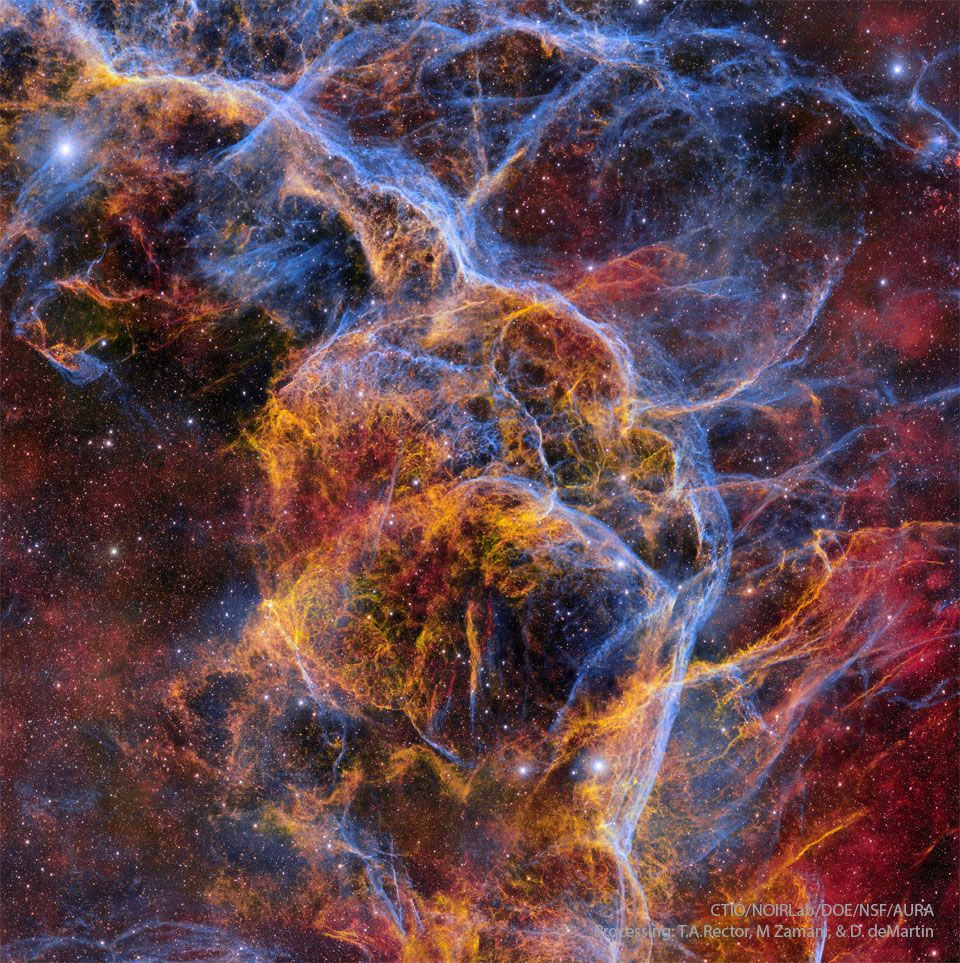

In [65]:
display(Image(req.get(imagen_del_dia).json()['url']))

La siguiente celda fue un contratiempo que ocurrió, se pueden ver directamente vídeos de youtube, por eso guardé el link.

In [68]:
#La foto del día es un puñetero video de Youtube, pero quiero verlo en mi NB
#from IPython.display import YouTubeVideo as yt
#yt(url= req.get(URL+imagen_del_dia).json()['url'],id = req.get(URL+imagen_del_dia).json()['url'].split('/')[-1])
#Esta era la url del día https://www.youtube.com/watch?v=YEXuGgRCyS0&themeRefresh=

### Twitter API, ejemplo

**https://developer.twitter.com/en/apply-for-access.html**
    
**http://docs.tweepy.org/en/latest/**

```python
import tweepy

API_KEY='apikey'
API_SECRET='apisecret'
ACCESS_TOKEN='tu_token'
TOKEN_SECRET='tu_tokensecret'

auth=tweepy.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, TOKEN_SECRET)

api=tweepy.API(auth)


def get_followers(user, count=100):
    results=api.followers(user, count=count)
    followers=[pd.Series(foll._json) for foll in results]
    df=pd.DataFrame(followers)
    return df

```

Hay APIs en las que necesitamos un usuario y clave para poder acceder a cierta información. En este caso, la API de Twitter, nos pide que nos registremos como desarrolladores y que creemos una cuenta y una APIKEY para poder acceder a la información....Eso para los que tengan tiempo y ganas.

Por necesidades didácticas necesitamos unos datos para poder acceder....os acordais lo que os comenté de que no metais claves en los commits...pues a diario hay muchos usuarios que cometen este error y dejan sus claves al descubierto....y si quisiéramos ser malos podríamos coger una o varias claves.

- Cagadinha #1 https://github.com/athulkannan2000/Scraper/commit/928d5a0208e443f93f6a4655119d08a6aaa7c6c0
- Cagadinha #2 https://github.com/bounswe/bounswe2023group2/commit/3864efcdcab44803a99e4d2fe0dc3174de5b819e

In [ ]:
#%pip install tweepy
import tweepy
# Con los datos de este amable user vamos a intentar hacer una llamada a la api de Twitter:
api_key = "DDBRBrNWRNxzzQPabEn5lEqyz"
api_key_secret =  "toA6YOnI3cEamC8MlwtKgxVd0iIIYrGPt8yOiDWPgSDKtJrSPK"
bearer_token = "AAAAAAAAAAAAAAAAAAAAANU9mgEAAAAAb8wiOZTvg7Op0hd0kuQx9ApWJPA%3Dq94whYf2ULFgWPgGIVHIfE11aMPZSImYEa0nZen6pjwXw6M3n7"
access_token = "1641132441149505541-zguPT6NzrClbxknBjH6ILazmo2jmKt"
access_token_secret = "sJZoNRjusLA8tCRXhK5ceu36LZTDIoFs09GOmwMXeg52m"

In [ ]:
obj_auth = tweepy.OAuthHandler(api_key, api_key_secret)
obj_auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(obj_auth)
tweets = api.user_timeline(screen_name='@mercadona', count=10, include_rts=False, tweet_mode='extended')

In [ ]:
for tweet in tweets:
    print(tweet.full_text)
    print('---------------------------------')

In [ ]:
#dentro de cada tweet tenemos un json con toda la info
tweets[0]._json #No os quiero ni contar lo que podemos sacar de aquí

In [ ]:
#vamos a ver los usuarios que siguen a la policia
seguidores = api.get_followers(screen_name='@policia', count=10)
for seguidor in seguidores:
    print(seguidor.screen_name)
    print('---------------------------------')

# SPOTIFY

In [69]:
# SPOTIFY
#Datos del ususario:
CLIENT_ID = '0fa761327b7a4787a964cea122c160f4'
CLIENT_SECRET = '4e6cf52288654385a4a28ff3769d5e65'

In [70]:
#Nos autenticamos en la API de Spotify
%pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 8.9 MB/s eta 0:00:00


In [71]:
#Vamos a ver que cosas podemos hacer con la API de Spotify
#Vamos a ver nuestras playlists
playlists = sp.user_playlists('SaraHenares')
playlists

{'href': 'https://api.spotify.com/v1/users/sarahenares/playlists?offset=0&limit=50',
 'items': [{'collaborative': False,
   'description': 'Café caliente, sillón blandito y la mejor lectura o compañía.',
   'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DWZkMGGysxknj'},
   'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DWZkMGGysxknj',
   'id': '37i9dQZF1DWZkMGGysxknj',
   'images': [{'height': None,
     'url': 'https://i.scdn.co/image/ab67706f000000034c33337d87fe67ee6c203685',
     'width': None}],
   'name': 'Café, Libros.',
   'owner': {'display_name': 'Spotify',
    'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
    'href': 'https://api.spotify.com/v1/users/spotify',
    'id': 'spotify',
    'type': 'user',
    'uri': 'spotify:user:spotify'},
   'primary_color': None,
   'public': True,
   'snapshot_id': 'MTcwOTkzODQ2MywwMDAwMDAwMGVhYTkyOGVkY2QyNjk3ODYzMTNiMWFjNTYyNzgxZThj',
   'tracks': {'href': 'https://api.spotify.com/v1/

In [72]:
playlists = sp.user_playlists('krohell')

for playlist in playlists['items']:
  print(f"{playlist['name']} : {playlist['description']}")

Chill : 
Goloson : 
Belladonna : 
Belladonna : 
Bum bum gustoso : 
Antequera : 
TECHNO 2024 : The best Techno tracks of 2024!
Favoritas de la radio : 
Marta infante – Contate Contarini : 
Jacques Offenbach – Offenbach: Vie Parisienne (La) (Excerpts) : 
Marc Minkowski – Offenbach: Orphée aux enfers : 
Hot Ride (Original Mix) : 
One More Time (short radio edit) : 
Three Piece Suit : 
Jazz : 
COTTON!!!!! : 
trankiletes!! : 
House of Jealous Lovers [Cosmos Vs The Rapture] : 
heavy...... : 
VITALIC : 
Riverside - Original Mix : 
OPERA : 
RIVER : 
BEETHOVEN: Piano Sonatas : 
Manuel de FALLA – Falla: Complete Solo Piano Music : 
ALBENIZ: Iberia/Suites españolas : 
Opera 2009 : 
Opera 2010 : 
Various Artists – Great Soprano Arias : 
Tosca (PUCCINI) : 
Boheme (PUCCINI) : 
Turandot (PUCCINI) : 
Madama butterfly (PUCCINI) : 
Requiem (MOZART) : 
Mefistofele (BOITO) : 
La Traviata (VERDI) : 
Nabucco (VERDI) : 
Rigoletto (VERDI) : 
Aida (VERDI) : 
Un ballo in maschera (VERDI) : 
Norma (BELLINI) : 
I

In [ ]:
#mas info detalla de las playlists:

In [73]:
for playlist in playlists['items']:
    print(playlist['name'])
    print(playlist['id'])
    print(playlist['external_urls']['spotify'])
    print(playlist['tracks']['total'])


Chill
62vyosUAQNcB6NZOQLFABM
https://open.spotify.com/playlist/62vyosUAQNcB6NZOQLFABM
1
Goloson
4SZFyNtcYLKuyxk10aq9Ft
https://open.spotify.com/playlist/4SZFyNtcYLKuyxk10aq9Ft
1
Belladonna
2wyuSFZeRGxxsL2uw2VOcK
https://open.spotify.com/playlist/2wyuSFZeRGxxsL2uw2VOcK
10
Belladonna
1veoDsyXRD1SYDnBajJ76t
https://open.spotify.com/playlist/1veoDsyXRD1SYDnBajJ76t
1
Bum bum gustoso
3hNW4EE25hx4NgVqxMOIwX
https://open.spotify.com/playlist/3hNW4EE25hx4NgVqxMOIwX
2
Antequera
0t5wUOq74Bt7F7i73NpT8K
https://open.spotify.com/playlist/0t5wUOq74Bt7F7i73NpT8K
3
TECHNO 2024
5qUiLFZRY0CdQJJNnvDMtY
https://open.spotify.com/playlist/5qUiLFZRY0CdQJJNnvDMtY
119
Favoritas de la radio
01BtDOtqAmVFnnUEudMl1f
https://open.spotify.com/playlist/01BtDOtqAmVFnnUEudMl1f
3
Marta infante – Contate Contarini
0TQPtkGqLEJ1Z3Km1xbqzs
https://open.spotify.com/playlist/0TQPtkGqLEJ1Z3Km1xbqzs
9
Jacques Offenbach – Offenbach: Vie Parisienne (La) (Excerpts)
5is0XflPGBlWDiIBpifh8D
https://open.spotify.com/playlist/5is0XflPGB

In [74]:
#Buscamos una canción
results = sp.search(q='tractor amarillo', limit=20)
results['tracks']['items'][0]

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/27dPlYE29FxN9yIwpsVXYF'},
    'href': 'https://api.spotify.com/v1/artists/27dPlYE29FxN9yIwpsVXYF',
    'id': '27dPlYE29FxN9yIwpsVXYF',
    'name': 'Zapato Veloz',
    'type': 'artist',
    'uri': 'spotify:artist:27dPlYE29FxN9yIwpsVXYF'}],
  'available_markets': ['AR',
   'AU',
   'AT',
   'BE',
   'BO',
   'BR',
   'BG',
   'CA',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DK',
   'DO',
   'DE',
   'EC',
   'EE',
   'SV',
   'FI',
   'FR',
   'GR',
   'GT',
   'HN',
   'HK',
   'HU',
   'IS',
   'IE',
   'IT',
   'LV',
   'LT',
   'LU',
   'MY',
   'MT',
   'MX',
   'NL',
   'NZ',
   'NI',
   'NO',
   'PA',
   'PY',
   'PE',
   'PH',
   'PL',
   'PT',
   'SG',
   'SK',
   'ES',
   'SE',
   'CH',
   'TW',
   'TR',
   'UY',
   'US',
   'GB',
   'AD',
   'LI',
   'MC',
   'ID',
   'JP',
   'TH',
   'VN',
   'RO',
   'IL',
   'ZA',
   'SA',
   'AE',
   'BH',
   'QA',
   'OM',

In [75]:
#Vamos a buscar una canción
results = sp.search(q='tractor amarillo', limit=20)
results
#Ahora descargamos la canción
sp.audio_features(results['tracks']['items'][0]['uri'])

[{'danceability': 0.858,
  'energy': 0.561,
  'key': 9,
  'loudness': -14.013,
  'mode': 1,
  'speechiness': 0.0372,
  'acousticness': 0.185,
  'instrumentalness': 0.00118,
  'liveness': 0.218,
  'valence': 0.975,
  'tempo': 145.022,
  'type': 'audio_features',
  'id': '128iWD7Q1rVvItX8HSdmLw',
  'uri': 'spotify:track:128iWD7Q1rVvItX8HSdmLw',
  'track_href': 'https://api.spotify.com/v1/tracks/128iWD7Q1rVvItX8HSdmLw',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/128iWD7Q1rVvItX8HSdmLw',
  'duration_ms': 189907,
  'time_signature': 4}]